In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from os.path import join

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5) 

# Copied from const.py in the `testbed` directory.
ID_2_MODEL = {0: "AlexNet", 1: "DenseNet", 2: "GoogLeNet", 3: "MobileNet", 4: "ResNet", 5: "SqueezeNet"}
filename = None

In [2]:
if filename is None:
    dirs = glob.glob("real-world/*/")
    most_recent_dir = sorted(dirs).pop()
    files = glob.glob(most_recent_dir + "*.csv")
    most_recent_file = sorted(files).pop()
    _filename = most_recent_file
else:
    _filename = filename

print(f"Loading file: {_filename}.")
data = pd.read_csv(_filename)
data.head()
# data.describe()
# TODO: We need to consider a `client_id` column for greater clarification w.r.t. delay.

Loading file: real-world/2021-02-10/22:21:20.409478.csv.


,Unnamed: 0,index,req_accuracy,req_delay,req_id,served_delay,served_model,served_pred,true_answer,high_acc,low_delay,client_id,served_model_name,served_accuracy,QoS,algorithm,mc_run
0,0,0,0.782639,0.097501,0,1.392813,3,237,237,True,True,rpi4-1,MobileNet,0.707407,0.638556,Optimal,0
1,1,1,0.916078,0.193750,1,1.232765,3,111,111,True,True,rpi4-1,MobileNet,0.707407,0.635911,Optimal,0
2,2,2,0.793965,0.085994,2,0.776978,3,72,74,True,True,rpi4-1,MobileNet,0.707407,0.783975,Optimal,0
3,3,3,0.843930,0.092316,3,0.364191,3,310,310,True,True,rpi4-1,MobileNet,0.707407,0.863770,Optimal,0
4,4,4,0.932059,0.141865,4,0.382184,3,138,138,True,True,rpi4-1,MobileNet,0.707407,0.827595,Optimal,0


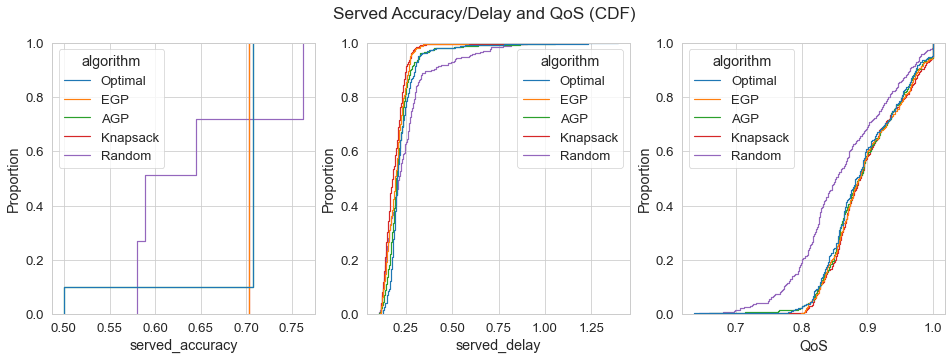

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.ecdfplot(x="served_accuracy", hue="algorithm", ax=axes[0], data=data)
sns.ecdfplot(x="served_delay", hue="algorithm", ax=axes[1], data=data)
sns.ecdfplot(x="QoS", hue="algorithm", ax=axes[2], data=data)
fig.suptitle("Served Accuracy/Delay and QoS (CDF)")
plt.show()

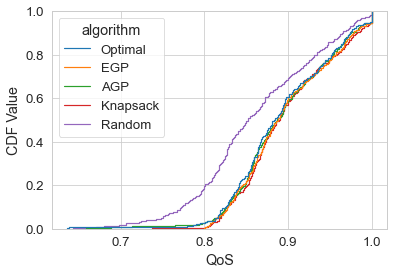

In [4]:
sns.ecdfplot(x="QoS", hue="algorithm", data=data)
plt.ylabel("CDF Value")
plt.savefig("plots/real-world/qos-ecdf.pdf")
plt.show()

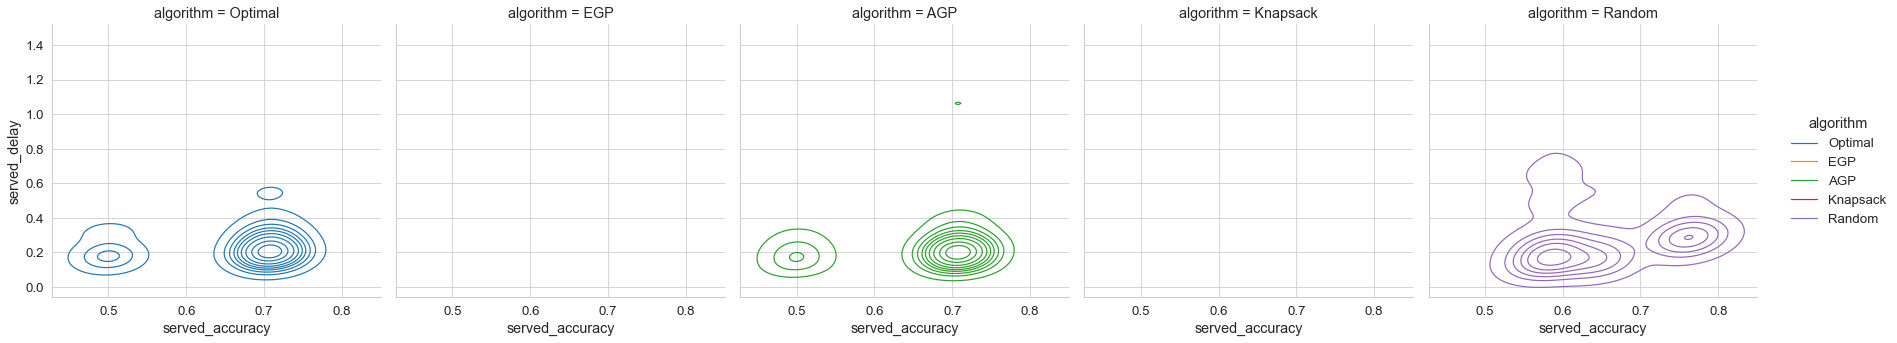

In [5]:
sns.displot(x="served_accuracy", y="served_delay", col="algorithm", hue="algorithm", kind="kde", data=data)
plt.show()

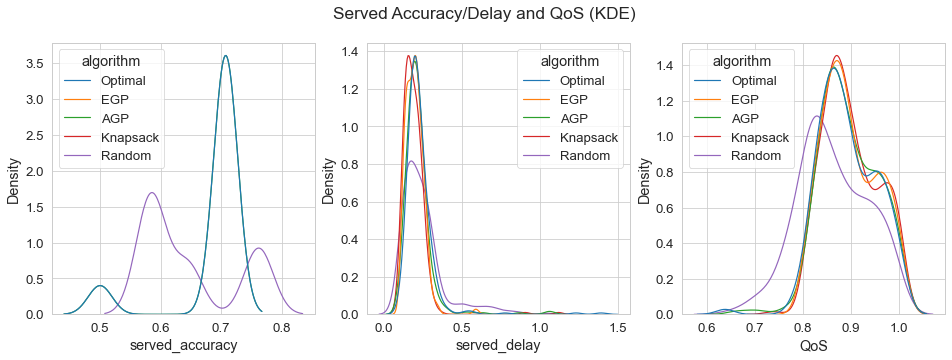

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.kdeplot(x="served_accuracy", hue="algorithm", ax=axes[0], data=data)
sns.kdeplot(x="served_delay", hue="algorithm", ax=axes[1], data=data)
sns.kdeplot(x="QoS", hue="algorithm", ax=axes[2], data=data)
fig.suptitle("Served Accuracy/Delay and QoS (KDE)")
plt.show()

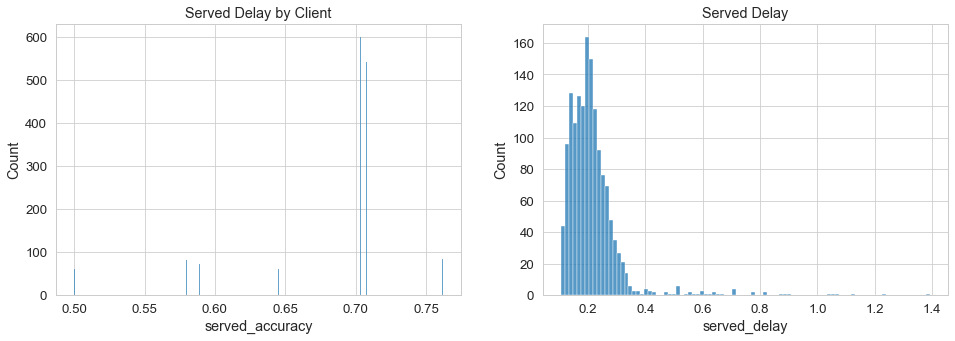

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# sns.histplot(x="served_delay", hue="client_id", ax=axes[0], data=data)
sns.histplot(x="served_accuracy", ax=axes[0], data=data)
sns.histplot(x="served_delay", ax=axes[1], data=data)
axes[0].set_title("Served Delay by Client")
axes[1].set_title("Served Delay")
plt.show()

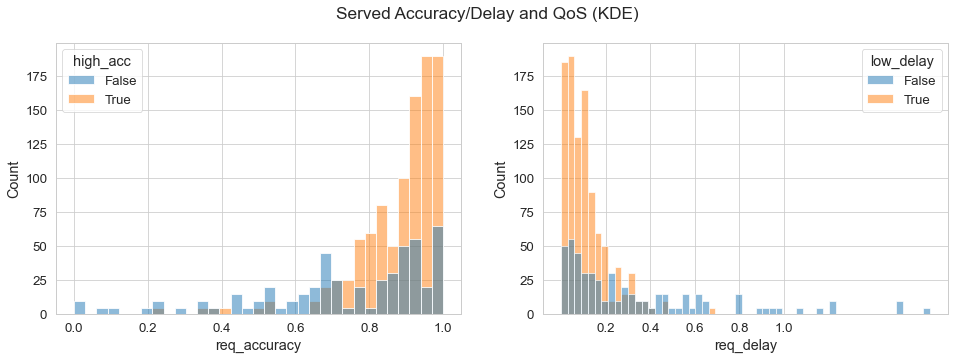

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x="req_accuracy", ax=axes[0], hue="high_acc", data=data)
sns.histplot(x="req_delay", ax=axes[1], hue="low_delay", data=data)
axes[1].set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
fig.suptitle("Served Accuracy/Delay and QoS (KDE)")
plt.show()

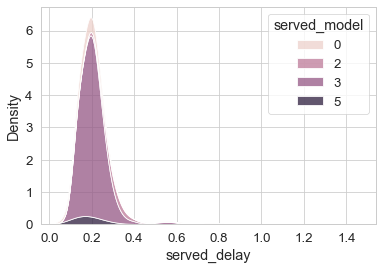

In [9]:
ax = sns.kdeplot(x="served_delay", hue="served_model", multiple="stack", data=data)
plt.show()

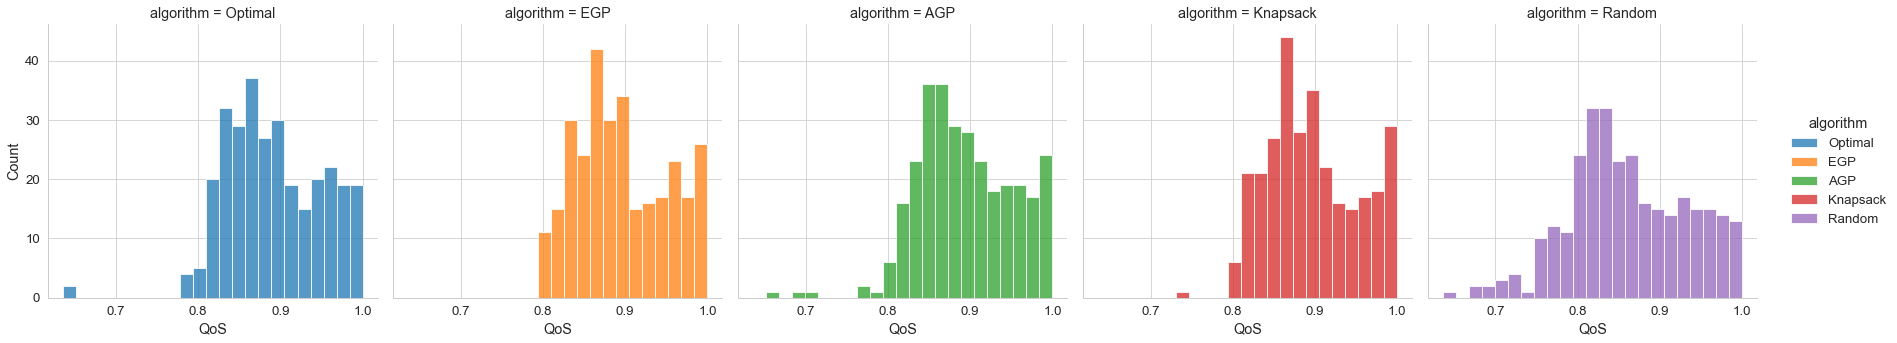

In [10]:
sns.displot(x="QoS", col="algorithm", hue="algorithm", data=data)
plt.show()

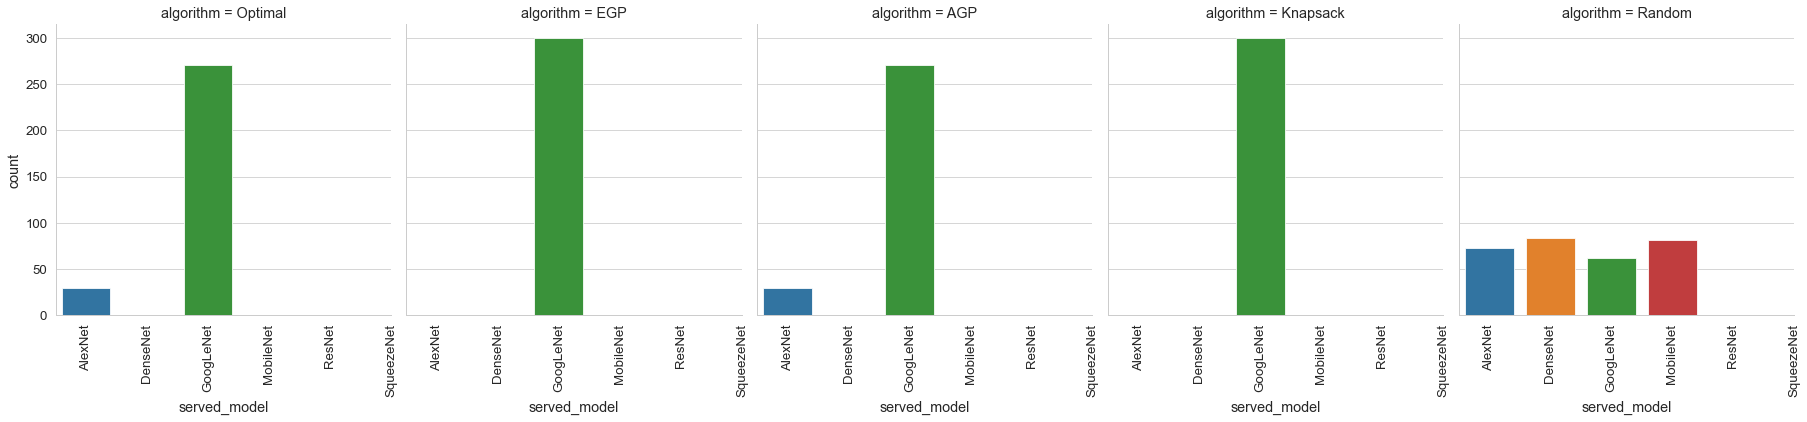

In [11]:
axes = sns.catplot(x="served_model", col="algorithm", kind="count", data=data).axes
for ax in axes[0]:
    ax.set_xticks(list(ID_2_MODEL.keys()))
    ax.set_xticklabels(ID_2_MODEL.values(), rotation=90)
plt.show()

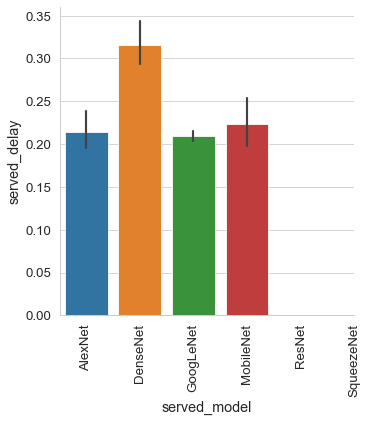

In [12]:
axes = sns.catplot(x="served_model", y="served_delay", kind="bar", data=data).axes
for ax in axes[0]:
    ax.set_xticks(list(ID_2_MODEL.keys()))
    ax.set_xticklabels(ID_2_MODEL.values(), rotation=90)
plt.show()

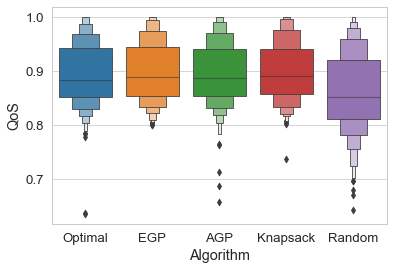

In [18]:
sns.boxenplot(x="algorithm", y="QoS", data=data)
plt.xlabel("Algorithm")
plt.savefig("plots/real-world/qos-boxen.pdf")
plt.show()

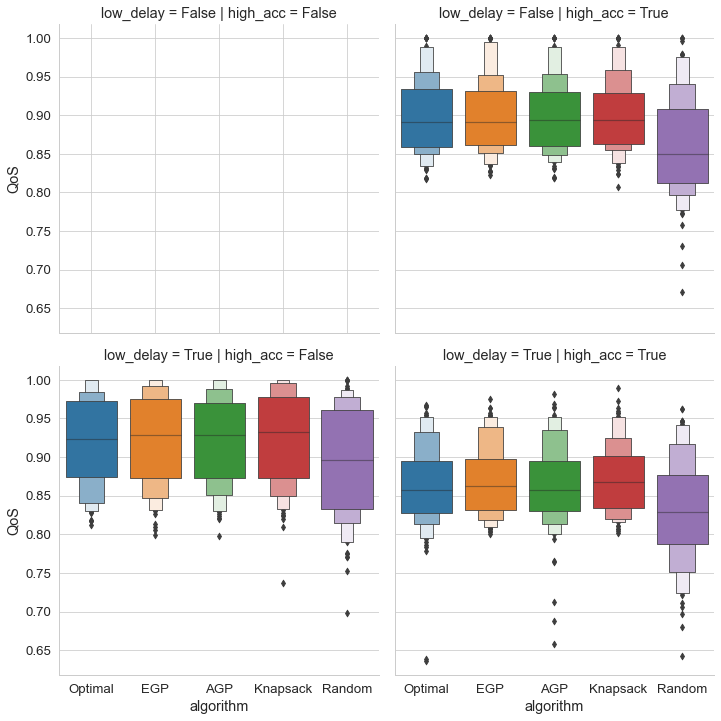

In [19]:
sns.catplot(x="algorithm", y="QoS", col="high_acc", row="low_delay", kind="boxen", data=data)
plt.show()